   > ## Importation des librairies:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


> ## Importation des algorithmes:

In [2]:
from sklearn.cluster import KMeans

> ## Importation du jeu de donnees et description:

In [3]:
Stress = pd.read_excel (r"C:\Users\Utilisateur\Documents\Master 2\Machine Learning\BDD.xlsx")

In [4]:
Stress.keys

<bound method NDFrame.keys of         hs      sr      rr     hr      bo     rem      lm       t  sl
0    1.840  93.800  25.680  74.20  89.840   99.60  16.600  91.840   3
1    1.552  91.640  25.104  72.76  89.552   98.88  15.880  91.552   3
2    7.000  60.000  20.000  60.00  95.000   85.00  10.000  96.000   1
3    0.768  85.760  23.536  68.84  88.768   96.92  13.920  90.768   3
4    8.248  48.120  17.248  53.12  96.248   72.48   6.496  97.872   0
..     ...     ...     ...    ...     ...     ...     ...     ...  ..
625  3.440  69.600  20.960  62.40  90.960   89.80  10.960  92.960   2
626  8.376  48.440  17.376  53.44  96.376   73.76   6.752  98.064   0
627  0.000  97.504  27.504  78.76  84.256  101.88  17.752  86.880   4
628  6.728  58.640  19.728  59.32  94.592   84.32   9.728  95.728   1
629  4.088  73.920  21.392  63.48  91.392   91.96  11.392  93.392   2

[630 rows x 9 columns]>

In [5]:
print (Stress.sr)
print (Stress.sl[0:3])

0      93.800
1      91.640
2      60.000
3      85.760
4      48.120
        ...  
625    69.600
626    48.440
627    97.504
628    58.640
629    73.920
Name: sr, Length: 630, dtype: float64
0    3
1    3
2    1
Name: sl, dtype: int64


In [6]:
Stress.head()

,hs,sr,rr,hr,bo,rem,lm,t,sl
0,1.840,93.80,25.680,74.20,89.840,99.60,16.600,91.840,3
1,1.552,91.64,25.104,72.76,89.552,98.88,15.880,91.552,3
2,7.000,60.00,20.000,60.00,95.000,85.00,10.000,96.000,1
3,0.768,85.76,23.536,68.84,88.768,96.92,13.920,90.768,3
4,8.248,48.12,17.248,53.12,96.248,72.48,6.496,97.872,0


In [7]:
print(Stress.columns)

Index(['hs', 'sr', 'rr', 'hr', 'bo', 'rem', 'lm', 't', 'sl'], dtype='object')


In [8]:
Stress.describe()

,hs,sr,rr,hr,bo,rem,lm,t,sl
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.00000,630.000000
mean,3.700000,71.600000,21.800000,64.500000,90.900000,88.500000,11.700000,92.80000,2.000000
std,3.054572,19.372833,3.966111,9.915277,3.902483,11.893747,4.299629,3.52969,1.415337
min,0.000000,45.000000,16.000000,50.000000,82.000000,60.000000,4.000000,85.00000,0.000000
25%,0.500000,52.500000,18.500000,56.250000,88.500000,81.250000,8.500000,90.50000,1.000000
50%,3.500000,70.000000,21.000000,62.500000,91.000000,90.000000,11.000000,93.00000,2.000000
75%,6.500000,91.250000,25.000000,72.500000,94.250000,98.750000,15.750000,95.50000,3.000000
max,9.000000,100.000000,30.000000,85.000000,97.000000,105.000000,19.000000,99.00000,4.000000


In [9]:
x = Stress[['hs','sr','rr','hr','bo', 'rem', 'lm', 't']]


In [10]:
Stress['sl'] = pd.Series(Stress.sl)
y = Stress[['sl']]

In [11]:
print(x)

        hs      sr      rr     hr      bo     rem      lm       t
0    1.840  93.800  25.680  74.20  89.840   99.60  16.600  91.840
1    1.552  91.640  25.104  72.76  89.552   98.88  15.880  91.552
2    7.000  60.000  20.000  60.00  95.000   85.00  10.000  96.000
3    0.768  85.760  23.536  68.84  88.768   96.92  13.920  90.768
4    8.248  48.120  17.248  53.12  96.248   72.48   6.496  97.872
..     ...     ...     ...    ...     ...     ...     ...     ...
625  3.440  69.600  20.960  62.40  90.960   89.80  10.960  92.960
626  8.376  48.440  17.376  53.44  96.376   73.76   6.752  98.064
627  0.000  97.504  27.504  78.76  84.256  101.88  17.752  86.880
628  6.728  58.640  19.728  59.32  94.592   84.32   9.728  95.728
629  4.088  73.920  21.392  63.48  91.392   91.96  11.392  93.392

[630 rows x 8 columns]


In [12]:
print(y)

     sl
0     3
1     3
2     1
3     3
4     0
..   ..
625   2
626   0
627   4
628   1
629   2

[630 rows x 1 columns]


In [13]:
from sklearn.preprocessing import normalize

In [14]:
Xs = normalize(x)

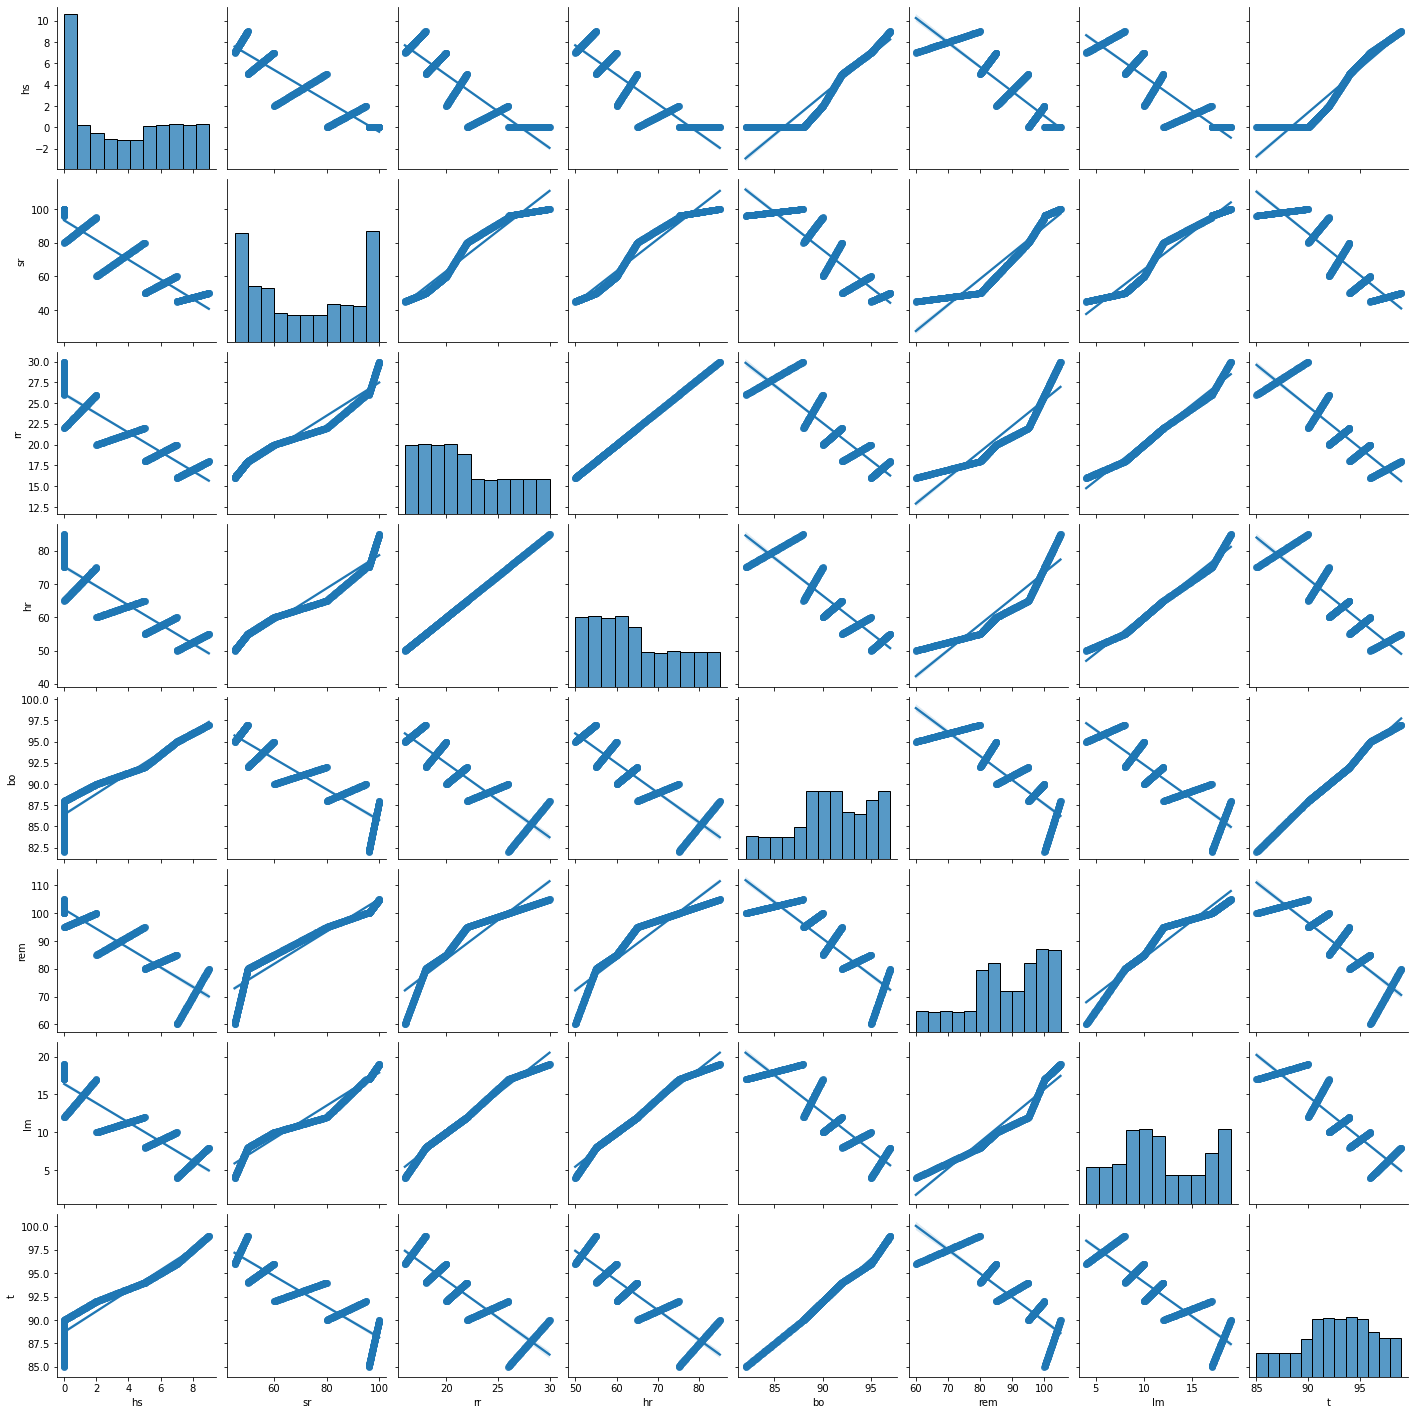

In [15]:
sns.pairplot(x, kind='reg')

In [16]:
from sklearn.model_selection import train_test_split 

In [17]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2)

In [18]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(504, 8)
(126, 8)
(504, 1)
(126, 1)


> ## K-Means 

In [19]:
k_mean2 = KMeans(n_clusters=2)
k_mean2.fit(Xs)

KMeans(n_clusters=2)

In [20]:
labels_2 = k_mean2.labels_
print (labels_2)

clusters_2 = k_mean2.cluster_centers_
clusters_2
       
       

[1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0
 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1
 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0
 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1
 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 1 0 1 0 1 0 

array([[0.0354069 , 0.30670459, 0.10532092, 0.32041598, 0.53660373,
        0.44650158, 0.04581   , 0.54570241],
       [0.00655723, 0.44578355, 0.12543715, 0.36381789, 0.4418841 ,
        0.49372209, 0.07622644, 0.45290421]])

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(Xs, labels_2)

0.6373340146415528

Text(0, 0.5, 'Niveau de stress')

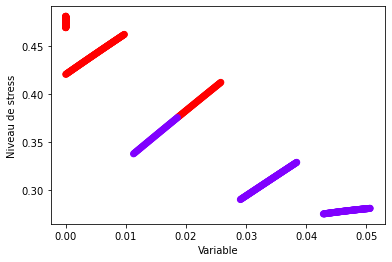

In [24]:
plt.scatter(Xs[:,0],Xs[:,1], c=k_mean2.labels_, cmap='rainbow')
plt.xlabel("Variable")
plt.ylabel("Niveau de stress")


In [25]:
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(Xs)

KMeans(n_clusters=4)

In [26]:
labels_4 = k_mean4.labels_
print (labels_4)

clusters_4 = k_mean4.cluster_centers_
clusters_4
       
       

[1 1 2 3 0 2 0 0 0 2 3 2 0 1 3 2 2 3 3 2 3 3 3 1 1 2 3 2 1 2 0 1 0 1 2 3 0
 1 0 1 2 2 3 0 3 1 2 1 2 1 0 2 1 0 2 3 1 1 3 2 1 3 0 2 1 2 0 2 1 0 2 1 2 0
 0 1 1 2 1 1 2 2 2 1 3 2 2 2 1 1 2 3 3 1 0 2 1 3 3 3 1 1 0 1 2 2 2 3 1 2 3
 1 0 1 3 1 3 3 0 2 2 1 1 2 3 1 1 2 2 1 3 0 1 1 2 0 0 3 1 0 3 3 3 0 3 0 0 0
 0 2 1 0 1 1 0 2 1 3 1 1 1 3 2 3 1 3 0 0 1 1 2 3 3 2 2 2 2 1 1 2 2 2 3 2 0
 3 0 3 2 3 2 2 1 1 1 0 0 0 3 1 0 0 0 3 1 0 3 1 2 2 2 3 0 0 1 3 0 3 2 2 2 1
 0 2 3 1 2 2 1 0 1 1 2 1 0 0 1 1 3 2 1 1 3 1 3 0 3 3 3 3 2 1 2 3 2 1 3 3 1
 3 1 3 3 0 0 2 3 3 3 3 1 1 2 0 1 2 3 1 1 1 1 3 0 1 0 2 1 1 1 2 1 0 1 0 1 0
 3 2 3 2 3 0 0 1 3 2 1 3 1 0 3 3 2 0 2 0 1 3 3 0 1 1 3 1 1 1 2 3 0 3 1 0 2
 3 1 0 2 0 0 1 0 0 2 1 3 1 0 2 1 1 3 1 1 3 1 3 0 1 2 3 3 2 3 3 1 0 3 0 2 1
 1 1 3 0 1 2 3 1 0 2 1 2 2 0 3 0 2 2 3 2 1 2 1 2 1 2 0 3 3 3 3 3 1 3 2 3 2
 3 1 3 0 1 1 2 2 0 2 1 3 0 2 1 1 0 0 2 2 0 1 0 1 3 0 3 3 3 3 1 1 2 1 2 2 2
 2 1 1 3 3 0 2 1 2 3 2 2 2 2 1 3 1 2 1 2 3 2 1 3 3 2 0 0 1 2 0 1 2 0 2 1 0
 0 1 3 2 1 2 3 2 1 2 1 2 

array([[0.04688365, 0.27866079, 0.09972238, 0.30801564, 0.56352896,
        0.41012684, 0.03505761, 0.57229336],
       [0.00243928, 0.46831334, 0.13203196, 0.37894549, 0.4224853 ,
        0.49488273, 0.08442268, 0.43392029],
       [0.02921273, 0.31922417, 0.10850076, 0.32752442, 0.52202672,
        0.46911099, 0.05222823, 0.53112013],
       [0.01315019, 0.40684415, 0.11561573, 0.34154943, 0.47327069,
        0.49081055, 0.06367247, 0.48377271]])

In [27]:
silhouette_score(Xs, labels_4)

0.5848269717088785

Text(0, 0.5, 'Niveau de stress')

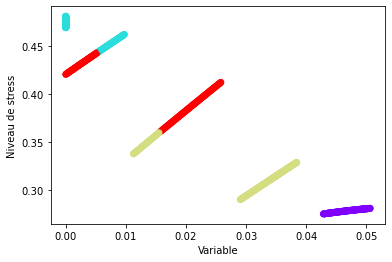

In [28]:
plt.scatter(Xs[:,0],Xs[:,1], c=k_mean4.labels_, cmap='rainbow')
plt.xlabel("Variable")
plt.ylabel("Niveau de stress")
